In [2]:
import pandas as pd #for data manipulation
from io import StringIO # for convert the data from text string to cvs
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_text = """
            transaction_id,station_id,date,product_type,volume_liters,transaction_amount_usd,inventory_level_liters
T1001,ST001,2025-08-25,Gasoline,50,45.0,20000
T1002,ST002,2025-08-25,Diesel,75,67.5,15000
T1003,ST003,2025-08-25,Gasoline,30,27.0,25000
T1004,ST004,2025-08-25,Diesel,40,36.0,18000
T1005,ST005,2025-08-25,Gasoline,60,54.0,22000
T1006,ST001,2025-08-26,Gasoline,55,49.5,19950
T1007,ST002,2025-08-26,Diesel,80,72.0,14920
T1008,ST003,2025-08-26,Gasoline,32,28.8,24970
T1009,ST004,2025-08-26,Diesel,42,37.8,17960
T1010,ST005,2025-08-26,Gasoline,65,58.5,21940
T1011,ST001,2025-08-27,Gasoline,58,52.2,19892
T1012,ST002,2025-08-27,Diesel,82,73.8,14838
T1013,ST003,2025-08-27,Gasoline,35,31.5,24935
T1014,ST004,2025-08-27,Diesel,45,40.5,17915
T1015,ST005,2025-08-27,Gasoline,68,61.2,21872
T1016,ST001,2025-08-28,Gasoline,52,46.8,19840
T1017,ST002,2025-08-28,Diesel,78,70.2,14760
T1018,ST003,2025-08-28,Gasoline,31,27.9,24904
T1019,ST004,2025-08-28,Diesel,41,36.9,17874
T1020,ST005,2025-08-28,Gasoline,63,56.7,21809
T1021,ST001,2025-08-29,Gasoline,56,50.4,19784
T1022,ST002,2025-08-29,Diesel,85,76.5,14675
T1023,ST003,2025-08-29,Gasoline,33,29.7,24871
T1024,ST004,2025-08-29,Diesel,44,39.6,17830
T1025,ST005,2025-08-29,Gasoline,67,60.3,21742
T1026,ST001,2025-08-30,Gasoline,53,47.7,19731
T1027,ST002,2025-08-30,Diesel,81,72.9,14594
T1028,ST003,2025-08-30,Gasoline,34,30.6,24837
T1029,ST004,2025-08-30,Diesel,43,38.7,17787
T1030,ST005,2025-08-30,Gasoline,66,59.4,21676
T1031,ST001,2025-08-31,Gasoline,54,48.6,19677
T1032,ST002,2025-08-31,Diesel,79,71.1,14515
T1033,ST003,2025-08-31,Gasoline,36,32.4,24801
T1033,ST003,2025-08-31,Gasoline,36,32.4,24801
T1034,ST004,2025-08-31,Diesel,46,41.4,17741
T1035,ST005,2025-08-31,Gasoline,69,62.1,21607
T1036,ST001,2025-08-31,Gasoline,100,0,19577
T1037,ST004,2025-08-31,Diesel,80,100,17661 

"""

data = StringIO(data_text)

dataframe = pd.read_csv(data)

In [4]:
dataframe.head()

,transaction_id,station_id,date,product_type,volume_liters,transaction_amount_usd,inventory_level_liters
0,T1001,ST001,2025-08-25,Gasoline,50,45.0,20000
1,T1002,ST002,2025-08-25,Diesel,75,67.5,15000
2,T1003,ST003,2025-08-25,Gasoline,30,27.0,25000
3,T1004,ST004,2025-08-25,Diesel,40,36.0,18000
4,T1005,ST005,2025-08-25,Gasoline,60,54.0,22000


In [5]:
dataframe.shape

(38, 7)

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0               transaction_id  38 non-null     object 
 1   station_id                  38 non-null     object 
 2   date                        38 non-null     object 
 3   product_type                38 non-null     object 
 4   volume_liters               38 non-null     int64  
 5   transaction_amount_usd      38 non-null     float64
 6   inventory_level_liters      38 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.2+ KB


In [7]:
dataframe[dataframe.duplicated(keep = False)]

,transaction_id,station_id,date,product_type,volume_liters,transaction_amount_usd,inventory_level_liters
32,T1033,ST003,2025-08-31,Gasoline,36,32.4,24801
33,T1033,ST003,2025-08-31,Gasoline,36,32.4,24801


In [8]:
dataframe = dataframe.drop_duplicates()

In [9]:
dataframe.duplicated().sum()

np.int64(0)

In [10]:
dataframe.isna().sum()

            transaction_id    0
station_id                    0
date                          0
product_type                  0
volume_liters                 0
transaction_amount_usd        0
inventory_level_liters        0
dtype: int64

In [11]:
dataframe.columns = dataframe.columns.str.strip()

In [12]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 0 to 37
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          37 non-null     object 
 1   station_id              37 non-null     object 
 2   date                    37 non-null     object 
 3   product_type            37 non-null     object 
 4   volume_liters           37 non-null     int64  
 5   transaction_amount_usd  37 non-null     float64
 6   inventory_level_liters  37 non-null     int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.3+ KB


In [13]:
dataframe['date'] = pd.to_datetime(dataframe['date'])

In [14]:
dataframe.dtypes

transaction_id                    object
station_id                        object
date                      datetime64[ns]
product_type                      object
volume_liters                      int64
transaction_amount_usd           float64
inventory_level_liters             int64
dtype: object

In [15]:
dataframe.to_csv("cleaned_dataset_1.csv", index=False)

# Exploratory Data Analysis

In [16]:
dataframe.drop(columns=['date']).describe()


,volume_liters,transaction_amount_usd,inventory_level_liters
count,37.000000,37.000000,37.000000
mean,56.972973,49.600000,19769.864865
std,18.454880,18.930927,3413.661061
min,30.000000,0.000000,14515.000000
25%,42.000000,36.900000,17787.000000
50%,55.000000,48.600000,19784.000000
75%,69.000000,61.200000,21872.000000
max,100.000000,100.000000,25000.000000


## Observation

1. Unusual Volume

- Volume liters ranges from 30 to 100 with a mean of ~57.

- The maximum value (100 liters) is quite a bit higher than the 75th percentile (69 liters), suggesting some unusually high sales volumes in certain transactions.

- Similarly, the minimum (30 liters) is below the 25th percentile (42 liters), indicating some unusually low volumes.
 Some transactions deviate significantly from typical volumes, which may require further investigation.

2. Negative or Zero Transactions

Transaction amount USD has a minimum of 0.

Although the mean is ~49.6 and the median is 48.6, the existence of 0-valued transactions indicates either free or failed transactions, or data entry errors.
Insight: There are transactions where no payment was recorded, which could point to refunds, errors, or system issues.

3. Inventory Drop

Inventory level liters ranges from 14515 to 25000 with a mean of ~19,770.

The minimum inventory (14515) is far below the 25th percentile (17787), showing a significant drop in stock for some periods.
Insight: Some transactions caused unusually large drops in inventory, which might indicate high demand periods or stock management issues.

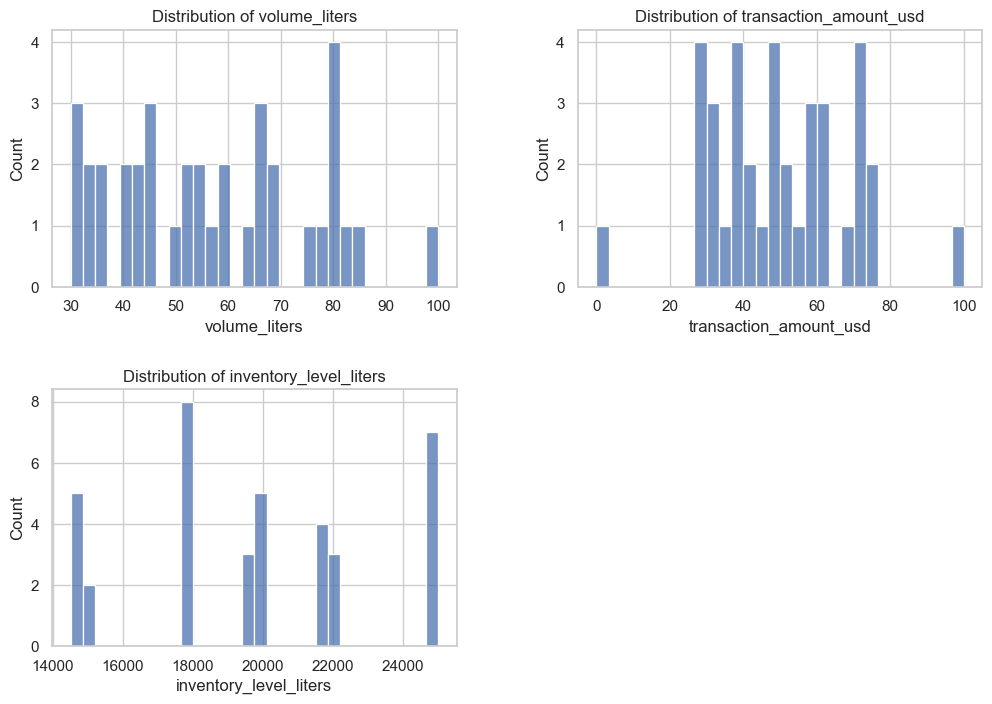

In [49]:
#Visulaizing the distribution of numerical columns

cols = ["volume_liters", "transaction_amount_usd", "inventory_level_liters"]

# Created a grid of subplots: 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  

# Flattened the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(dataframe[col], bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Hide the unused 4th subplot
plt.subplots_adjust(hspace=0.4, wspace=0.3)  
fig.delaxes(axes[-1])  

In [50]:
dataframe.columns

Index(['transaction_id', 'station_id', 'date', 'product_type', 'volume_liters',
       'transaction_amount_usd', 'inventory_level_liters', 'year', 'month',
       'day'],
      dtype='object')

In [19]:
dataframe["station_id"].nunique()

5

In [20]:
dataframe['transaction_id'].nunique()

37

In [21]:
dataframe['year'] = dataframe['date'].dt.year
dataframe['month'] = dataframe['date'].dt.month
dataframe['day'] = dataframe['date'].dt.day

In [22]:
dataframe.head()

,transaction_id,station_id,date,product_type,volume_liters,transaction_amount_usd,inventory_level_liters,year,month,day
0,T1001,ST001,2025-08-25,Gasoline,50,45.0,20000,2025,8,25
1,T1002,ST002,2025-08-25,Diesel,75,67.5,15000,2025,8,25
2,T1003,ST003,2025-08-25,Gasoline,30,27.0,25000,2025,8,25
3,T1004,ST004,2025-08-25,Diesel,40,36.0,18000,2025,8,25
4,T1005,ST005,2025-08-25,Gasoline,60,54.0,22000,2025,8,25


In [23]:
dataframe['year'].unique()

array([2025], dtype=int32)

In [24]:
dataframe['day'].unique()

array([25, 26, 27, 28, 29, 30, 31], dtype=int32)

In [25]:
avg_by_product_type = dataframe.groupby("product_type")[[
    "volume_liters", 
    "transaction_amount_usd", 
    "inventory_level_liters"
]].mean()

avg_by_product_type

,volume_liters,transaction_amount_usd,inventory_level_liters
product_type,,,
Diesel,62.733333,58.326667,16404.666667
Gasoline,53.045455,43.650000,22064.318182


## Observation

### Average sales volume per transaction

- Diesel: ~62.7 liters

- Gasoline: ~53.0 liters

Customers typically buy more liters of Diesel per transaction than Gasoline.

### Average transaction amount (in USD)

- Diesel: ~$58.33

- Gasoline: ~$43.65

Diesel transactions tend to generate higher revenue per transaction than Gasoline.

### Average inventory levels

- Diesel: ~16,405 liters in stock

- Gasoline: ~22,064 liters in stock

On average, Gasoline inventory is kept higher than Diesel. This might suggest:

Higher demand for Gasoline → needs more stock

Or stocking policy differences (Gasoline might be cheaper to store or more frequently sold) 
Or Gasoline’s higher inventory might be due to slower sales compared to Diesel

### Efficiency insight

Even though Diesel has lower inventory, it achieves higher transaction amounts per customer.
Gasoline has higher inventory, but each sale brings in less revenue.

In [26]:
# Number of transactions per product type
transaction_counts = dataframe.groupby("product_type")["transaction_id"].nunique()

# Total revenue per product type
total_revenue = dataframe.groupby("product_type")["transaction_amount_usd"].sum()

# putting them in one summary
summary = pd.DataFrame({
    "transactions": transaction_counts,
    "total_revenue_usd": total_revenue
})


In [27]:
summary

,transactions,total_revenue_usd
product_type,,
Diesel,15,874.9
Gasoline,22,960.3


## Observations

### Diesel = higher value per transaction

- 15 transactions gives a total revenue of 874.9 usd and an average transaction amount of $58.3 usd each.

- Customers who buy Diesel spend more per visit.

- Gasoline = higher frequency, lower value per transaction

- 22 transactions gives 960.3 usd and an average 43.7 usd each.

More people buy Gasoline, but they spend less per transaction.

### Revenue balance

- Gasoline only slightly beats Diesel in total revenue 960 vs. 875 dollars.

- This means Diesel is very efficient: fewer sales give almost the same revenue as more Gasoline sales.

### Inventory strategy

Keeping higher Gasoline inventory makes sense because:

- More people are buying it (higher frequency).

- Even if each sale is smaller, stockouts would frustrate more customers.

- Diesel sells in larger quantities, but to fewer buyers — so the lower stock level is still sufficient.

The analysis confirms that the higher inventory level of Gasoline is not due to low sales. In fact, Gasoline records more transactions (22 vs. 15 for Diesel), even though each transaction involves a smaller average purchase. This higher sales frequency justifies maintaining a larger inventory to meet demand, whereas Diesel requires less stock because it sells in larger volumes per transaction but to fewer customers.

In [28]:
dataframe.columns

Index(['transaction_id', 'station_id', 'date', 'product_type', 'volume_liters',
       'transaction_amount_usd', 'inventory_level_liters', 'year', 'month',
       'day'],
      dtype='object')

In [29]:
#Sales distribution by station

station_summary = dataframe.groupby("station_id").agg(
    transactions=("transaction_id", "nunique"),
    total_revenue=("transaction_amount_usd", "sum"),
    total_volume=("volume_liters", "sum"),
    avg_transaction=("transaction_amount_usd", "mean")
)

station_summary

,transactions,total_revenue,total_volume,avg_transaction
station_id,,,,
ST001,8,340.2,478,42.525000
ST002,7,504.0,560,72.000000
ST003,7,207.9,231,29.700000
ST004,8,370.9,381,46.362500
ST005,7,412.2,458,58.885714


In [30]:
# Count transactions by station and product type
product_pref = dataframe.groupby(["station_id", "product_type"])["transaction_id"].nunique().reset_index()

# Pivot for cleaner view (stations as rows, product types as columns)
product_pref_pivot = product_pref.pivot(index="station_id", columns="product_type", values="transaction_id").fillna(0)

# Added total transactions per station
product_pref_pivot["Total"] = product_pref_pivot.sum(axis=1)

product_pref_pivot


product_type,Diesel,Gasoline,Total
station_id,,,
ST001,0.0,8.0,8.0
ST002,7.0,0.0,7.0
ST003,0.0,7.0,7.0
ST004,8.0,0.0,8.0
ST005,0.0,7.0,7.0


## Observations

- ST001, ST003, ST005 sell only Gasoline
  
- These might be urban/commuter-focused stations where cars dominate.

- ST002, ST004 sell 100% Diesel

These might be industrial or trucking-route stations, serving heavy-duty vehicles.

- No mixed stations in the data. Each station sells only one product type.


In [31]:

#Inventory vs. Sales efficiency
station_efficiency = dataframe.groupby("station_id").agg(
    avg_inventory=("inventory_level_liters", "mean"),  
    total_volume_sold=("volume_liters", "sum")        
).reset_index()

# Added an efficiency ratio (sales vs. inventory)
station_efficiency["sales_to_inventory_ratio"] = (
    station_efficiency["total_volume_sold"] / station_efficiency["avg_inventory"]
)

station_efficiency


,station_id,avg_inventory,total_volume_sold,sales_to_inventory_ratio
0,ST001,19806.375000,478,0.024134
1,ST002,14757.428571,560,0.037947
2,ST003,24902.571429,231,0.009276
3,ST004,17846.000000,381,0.021349
4,ST005,21806.571429,458,0.021003


## Observations

### ST002 gives highest efficiency (0.0379)

- Smallest inventory (~14.8k liters), but highest sales (560 liters).

- Ratio is the best, meaning this station sells fuel the fastest relative to its stock.

### ST003 gives the lowest efficiency (0.0093)

- Largest average inventory (~24.9k liters), but very low sales (231 liters).

- This station is likely overstocked — a lot of fuel sits unsold.

### ST001, ST004, ST005 give moderate efficiency

- Ratios around 0.021–0.024.

- These stations sell at a steady but less efficient pace compared to ST002.

In [32]:
#Customer Behaviour by station

station_behavior = dataframe.groupby("station_id").agg(
    avg_liters_per_transaction=("volume_liters", "mean"),
    avg_usd_per_transaction=("transaction_amount_usd", "mean")
).reset_index()

station_behavior


,station_id,avg_liters_per_transaction,avg_usd_per_transaction
0,ST001,59.750000,42.525000
1,ST002,80.000000,72.000000
2,ST003,33.000000,29.700000
3,ST004,47.625000,46.362500
4,ST005,65.428571,58.885714


## Observations

### Big spenders = ST002

- Customers buy 80 liters per transaction on average and spend the most ($72).

- These are likely Diesel-heavy, industrial customers (consistent with your product-preference result: ST002 = Diesel-only).

### Small buyers = ST003

- Customers only buy ~33 liters per transaction, spending just ~$29.7.

- This looks like a low-demand Gasoline station with weaker customer purchasing power.

### Mid-range stations = ST001, ST004, ST005

- Purchases range 47–65 liters per transaction.

- Revenue per transaction is moderate ($42–59).

In [33]:
dataframe.columns

Index(['transaction_id', 'station_id', 'date', 'product_type', 'volume_liters',
       'transaction_amount_usd', 'inventory_level_liters', 'year', 'month',
       'day'],
      dtype='object')

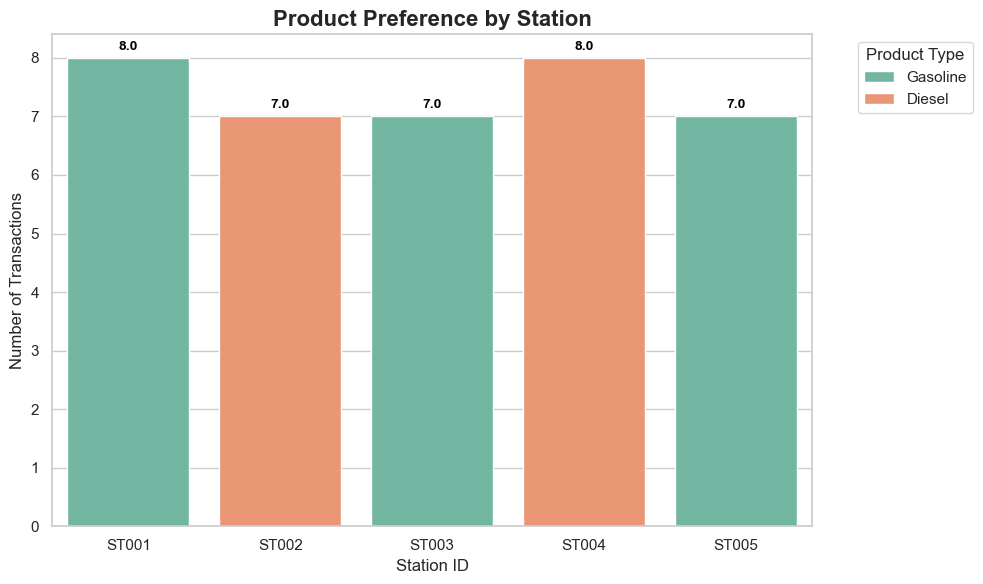

In [34]:
# Set a clean style
sns.set_theme(style="whitegrid")

# Aggregate product preference by station
product_pref = (
    dataframe.groupby(["station_id", "product_type"])["transaction_id"]
    .count()
    .reset_index()
    .rename(columns={"transaction_id": "transaction_count"})
)

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=product_pref,
    x="station_id",
    y="transaction_count",
    hue="product_type",
    palette="Set2"
)

# Add titles and labels
plt.title("Product Preference by Station", fontsize=16, weight="bold")
plt.xlabel("Station ID", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)

# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only annotate bars that exist
        ax.annotate(
            f"{height:.1f}",
            (p.get_x() + p.get_width() / 2., height),
            ha="center", va="center",
            xytext=(0, 8),
            textcoords="offset points",
            fontsize=10, color="black", weight="bold"
        )

# Move legend outside
plt.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#Save plot
plt.savefig("Product_prefrence_by_station.png", dpi = 300, bbox_inches = "tight")

plt.show()


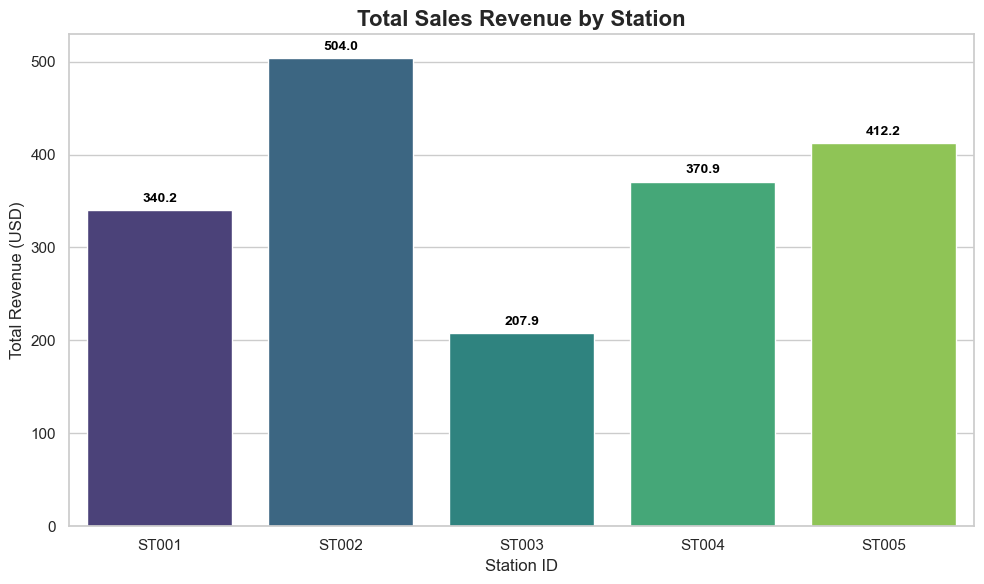

In [35]:
# Aggregated revenue by station
station_sales = (
    dataframe.groupby("station_id")["transaction_amount_usd"]
    .sum()
    .reset_index()
    .rename(columns={"transaction_amount_usd": "total_revenue"})
)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=station_sales,
    x="station_id",
    y="total_revenue",
    hue="station_id",       
    dodge=False,            
    palette="viridis",
    legend=False            
)

# Titles & labels
plt.title("Total Sales Revenue by Station", fontsize=16, weight="bold")
plt.xlabel("Station ID", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)

# Added values
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center", va="center",
        xytext=(0, 8),
        textcoords="offset points",
        fontsize=10, color="black", weight="bold"
    )

plt.tight_layout()

#Save plot
plt.savefig("Total_Sales_Revenue_By_Station.png", dpi = 300, bbox_inches = "tight")
plt.show()


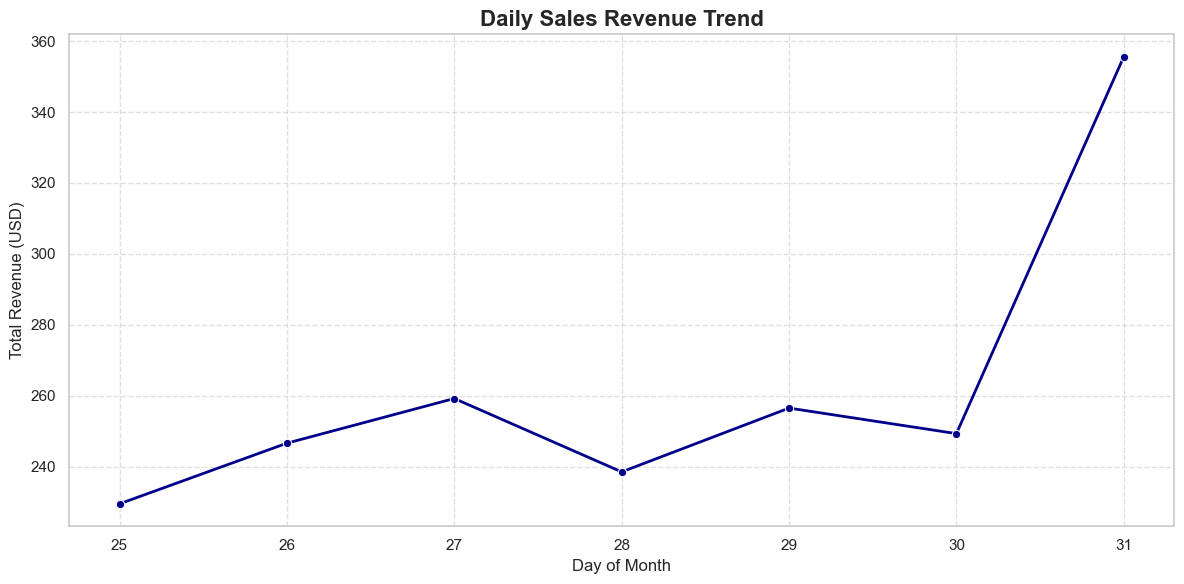

In [36]:
# revenue by day
daily_sales = (
    dataframe.groupby("day")["transaction_amount_usd"]
    .sum()
    .reset_index()
    .rename(columns={"transaction_amount_usd": "total_revenue"})
)

# Plot
plt.figure(figsize=(12,6))
ax = sns.lineplot(
    data=daily_sales,
    x="day",
    y="total_revenue",
    marker="o",
    linewidth=2,
    color="darkblue"
)

# Titles & labels
plt.title("Daily Sales Revenue Trend", fontsize=16, weight="bold")
plt.xlabel("Day of Month", fontsize=12)
plt.ylabel("Total Revenue (USD)", fontsize=12)

# grid for readability
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()

#Save plot
plt.savefig("Daily_Sales_Revenue_Trend.png", dpi = 300, bbox_inches = "tight")
plt.show()


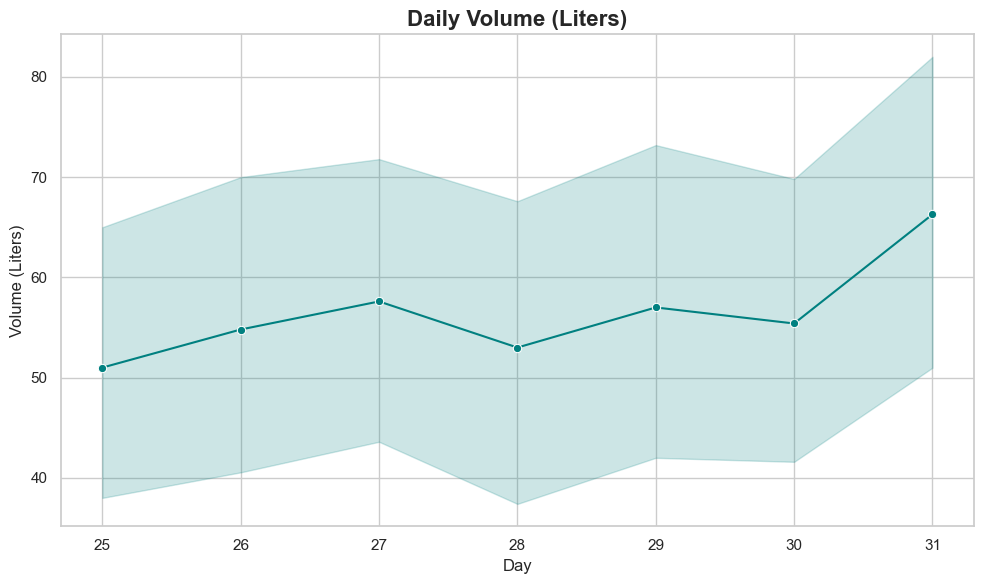

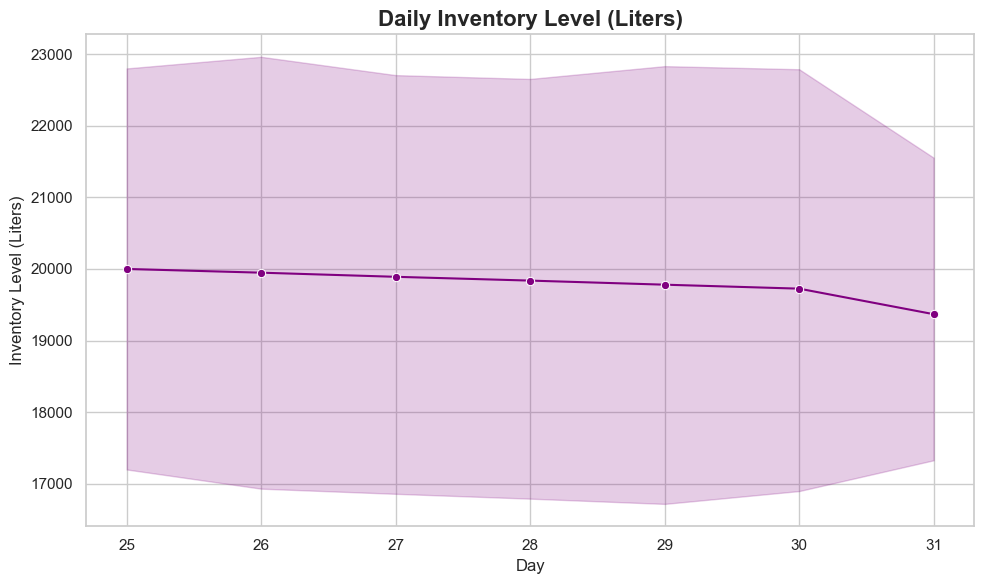

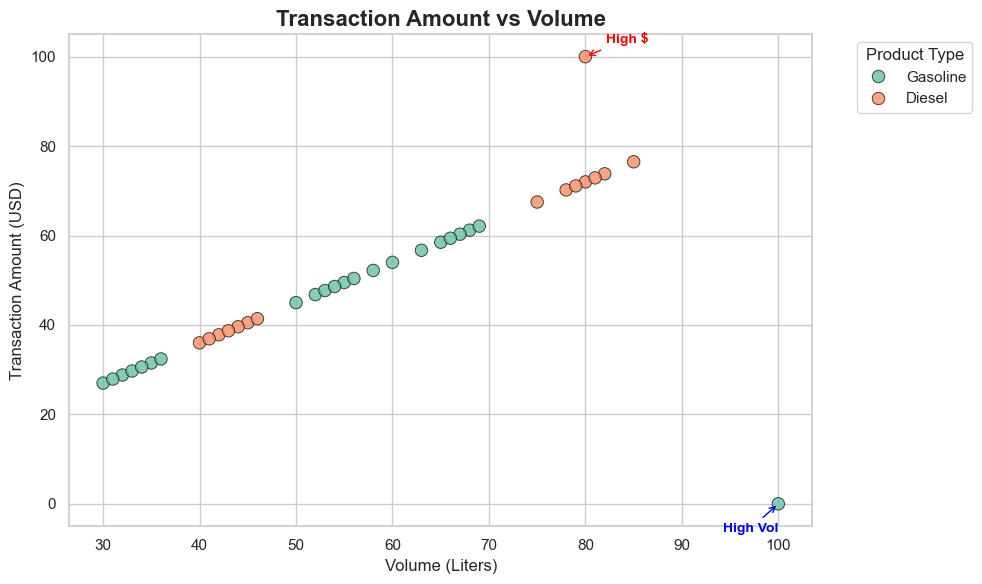

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# =========================
# 1. Line plot: Day vs Volume Liters (with anomalies)
# =========================
plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=dataframe,
    x="day",
    y="volume_liters",
    marker="o",
    color="teal"
)

# Highlight max & min
max_day = dataframe.loc[dataframe["volume_liters"].idxmax()]
min_day = dataframe.loc[dataframe["volume_liters"].idxmin()]
ax.annotate("Max", (max_day["day"], max_day["volume_liters"]),
            xytext=(0,10), textcoords="offset points",
            ha="center", fontsize=10, weight="bold", color="red")
ax.annotate("Min", (min_day["day"], min_day["volume_liters"]),
            xytext=(0,-15), textcoords="offset points",
            ha="center", fontsize=10, weight="bold", color="blue")

plt.title("Daily Volume (Liters)", fontsize=16, weight="bold")
plt.xlabel("Day", fontsize=12)
plt.ylabel("Volume (Liters)", fontsize=12)
plt.tight_layout()
plt.show()

# =========================
#Day vs Inventory Level (with anomalies)
# =========================
plt.figure(figsize=(10,6))
ax = sns.lineplot(
    data=dataframe,
    x="day",
    y="inventory_level_liters",
    marker="o",
    color="purple"
)

# Highlight max & min
max_day = dataframe.loc[dataframe["inventory_level_liters"].idxmax()]
min_day = dataframe.loc[dataframe["inventory_level_liters"].idxmin()]
ax.annotate("Max", (max_day["day"], max_day["inventory_level_liters"]),
            xytext=(0,10), textcoords="offset points",
            ha="center", fontsize=10, weight="bold", color="red")
ax.annotate("Min", (min_day["day"], min_day["inventory_level_liters"]),
            xytext=(0,-15), textcoords="offset points",
            ha="center", fontsize=10, weight="bold", color="blue")

plt.title("Daily Inventory Level (Liters)", fontsize=16, weight="bold")
plt.xlabel("Day", fontsize=12)
plt.ylabel("Inventory Level (Liters)", fontsize=12)
plt.tight_layout()
plt.show()

# =========================
# Volume vs Transaction Amount (with anomalies)
# =========================
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=dataframe,
    x="volume_liters",
    y="transaction_amount_usd",
    hue="product_type",
    palette="Set2",
    s=80,
    alpha=0.8,
    edgecolor="k"
)

# Highlight highest transaction & highest volume
max_txn = dataframe.loc[dataframe["transaction_amount_usd"].idxmax()]
max_vol = dataframe.loc[dataframe["volume_liters"].idxmax()]

ax.annotate("High $", (max_txn["volume_liters"], max_txn["transaction_amount_usd"]),
            xytext=(15,10), textcoords="offset points",
            fontsize=10, weight="bold", color="red",
            arrowprops=dict(arrowstyle="->", color="red"))
ax.annotate("High Vol", (max_vol["volume_liters"], max_vol["transaction_amount_usd"]),
            xytext=(-40,-20), textcoords="offset points",
            fontsize=10, weight="bold", color="blue",
            arrowprops=dict(arrowstyle="->", color="blue"))

plt.title("Transaction Amount vs Volume", fontsize=16, weight="bold")
plt.xlabel("Volume (Liters)", fontsize=12)
plt.ylabel("Transaction Amount (USD)", fontsize=12)
plt.legend(title="Product Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

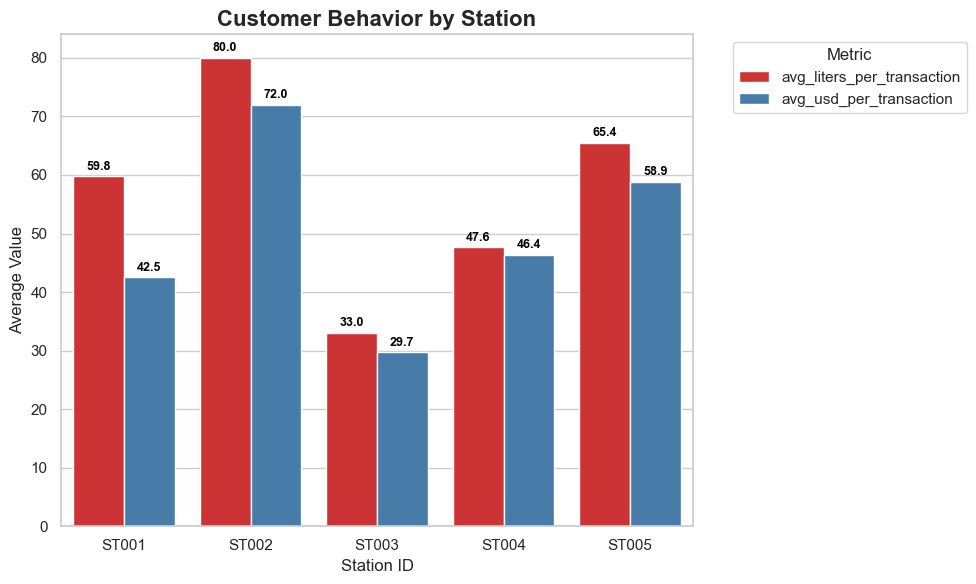

In [38]:
# Aggregated customer behavior
cust_behavior = (
    dataframe.groupby("station_id")
    .agg(
        avg_liters_per_transaction=("volume_liters", "mean"),
        avg_usd_per_transaction=("transaction_amount_usd", "mean")
    )
    .reset_index()
)

# Melt dataframe for grouped bar plotting
cust_behavior_melted = cust_behavior.melt(
    id_vars="station_id",
    value_vars=["avg_liters_per_transaction", "avg_usd_per_transaction"],
    var_name="metric",
    value_name="average_value"
)

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=cust_behavior_melted,
    x="station_id",
    y="average_value",
    hue="metric",
    palette="Set1"
)

# Titles & labels
plt.title("Customer Behavior by Station", fontsize=16, weight="bold")
plt.xlabel("Station ID", fontsize=12)
plt.ylabel("Average Value", fontsize=12)

# Add values on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # only annotate non-zero bars
        ax.annotate(
            f"{height:.1f}",
            (p.get_x() + p.get_width()/2., height),
            ha="center", va="center",
            xytext=(0, 7),
            textcoords="offset points",
            fontsize=9, color="black", weight="bold"
        )


plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

#Save plot
plt.savefig("Customer_Behaviour_by_Station.png", dpi = 300, bbox_inches = "tight")
plt.show()


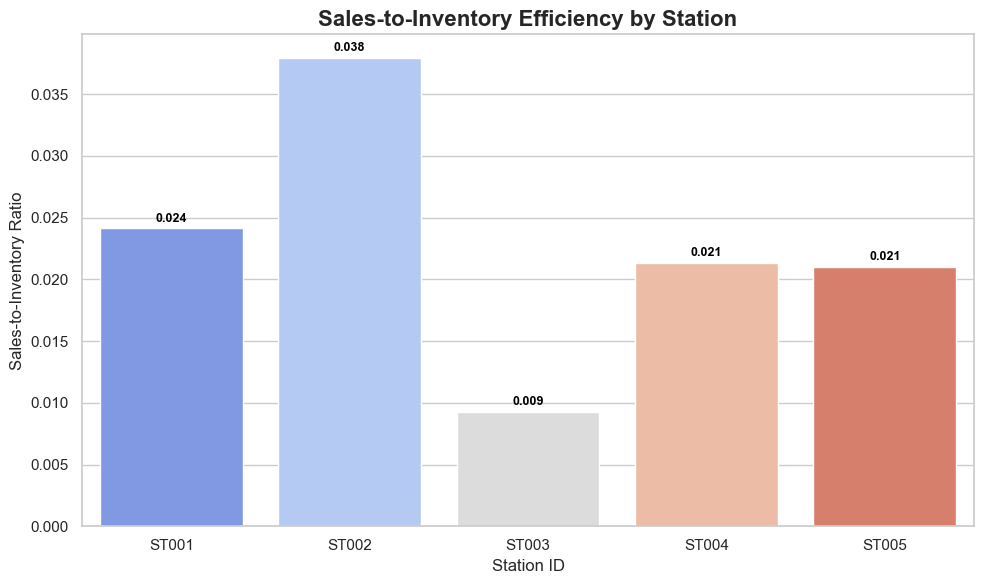

In [39]:
# Aggregate inventory vs sales efficiency
inv_sales_eff = (
    dataframe.groupby("station_id")
    .agg(
        avg_inventory=("inventory_level_liters", "mean"),
        total_volume_sold=("volume_liters", "sum")
    )
    .reset_index()
)

# Calculate ratio
inv_sales_eff["sales_to_inventory_ratio"] = (
    inv_sales_eff["total_volume_sold"] / inv_sales_eff["avg_inventory"]
)

# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=inv_sales_eff,
    x="station_id",
    y="sales_to_inventory_ratio",
    hue="station_id",     
    dodge=False,          
    palette="coolwarm",
    legend=False          
)

# Titles & labels
plt.title("Sales-to-Inventory Efficiency by Station", fontsize=16, weight="bold")
plt.xlabel("Station ID", fontsize=12)
plt.ylabel("Sales-to-Inventory Ratio", fontsize=12)

# Add values on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(
            f"{height:.3f}",
            (p.get_x() + p.get_width()/2., height),
            ha="center", va="center",
            xytext=(0, 7),
            textcoords="offset points",
            fontsize=9, color="black", weight="bold"
        )

plt.tight_layout()

#Save plot
plt.savefig("Customer_Behaviour_by_Station.png", dpi = 300, bbox_inches = "tight")

plt.show()


## Observation

Sales-to-Inventory Ratio across stations indicates significant variation in inventory efficiency. Station ST002 has the highest ratio (0.038), suggesting strong inventory turnover and healthy demand relative to stock levels. Stations ST001 (0.024) and ST004/ST005 (0.021) show moderate performance, indicating stable but less aggressive turnover. However, ST003 (0.009) exhibits the lowest ratio, pointing to potential inefficiencies such as overstocking, weak sales, or possible leakage issues

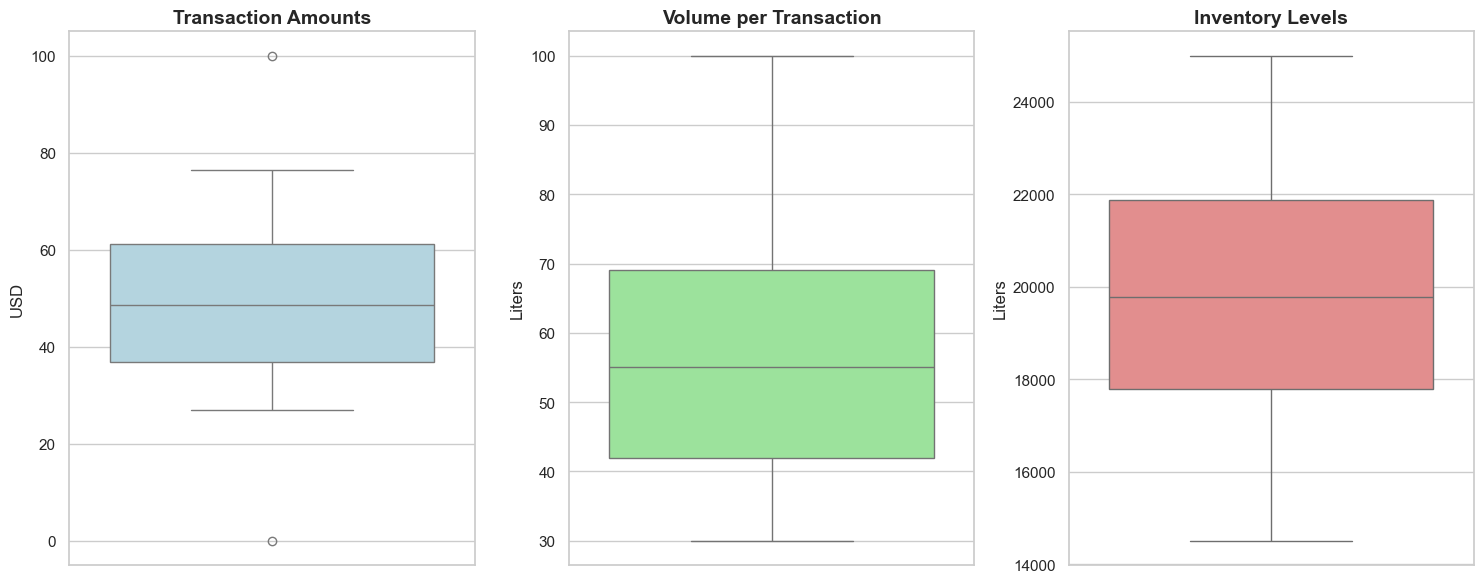

In [40]:
plt.figure(figsize=(15,6))

# Transaction Amount
plt.subplot(1,3,1)
sns.boxplot(
    data=dataframe,
    y="transaction_amount_usd",
    color="lightblue"
)
plt.title("Transaction Amounts", fontsize=14, weight="bold")
plt.ylabel("USD")

# Volume Liters
plt.subplot(1,3,2)
sns.boxplot(
    data=dataframe,
    y="volume_liters",
    color="lightgreen"
)
plt.title("Volume per Transaction", fontsize=14, weight="bold")
plt.ylabel("Liters")

# Inventory Levels
plt.subplot(1,3,3)
sns.boxplot(
    data=dataframe,
    y="inventory_level_liters",
    color="lightcoral"
)
plt.title("Inventory Levels", fontsize=14, weight="bold")
plt.ylabel("Liters")

plt.tight_layout()
plt.show()


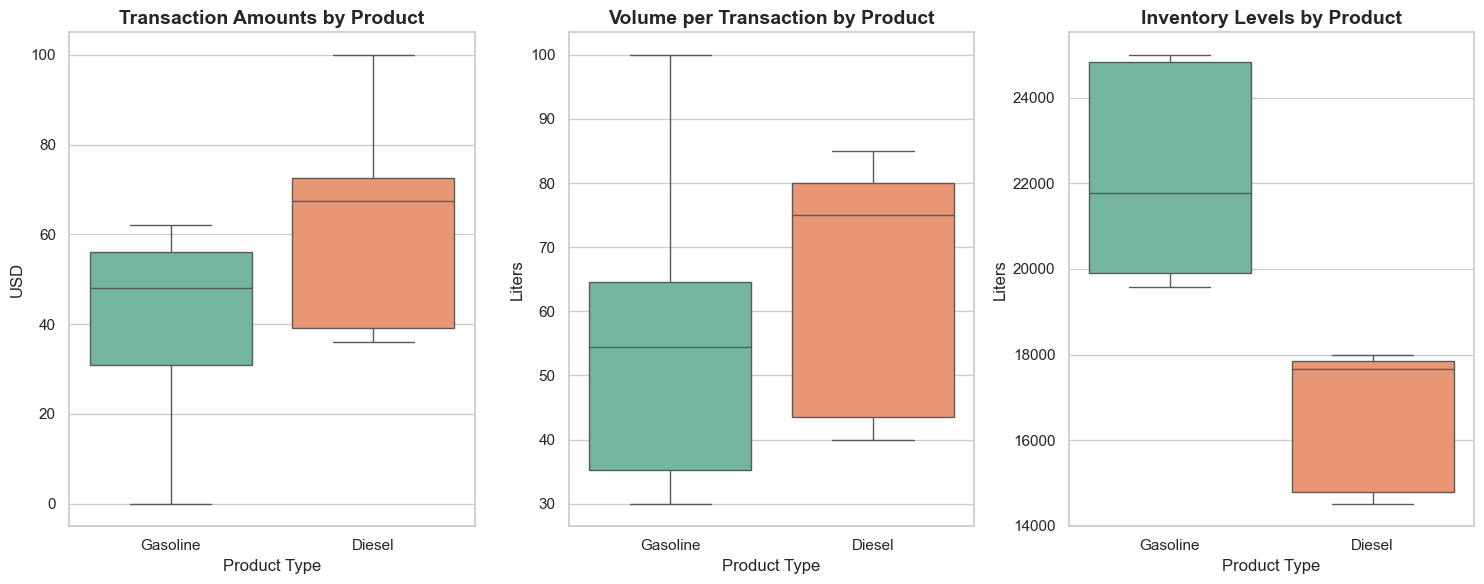

In [41]:
plt.figure(figsize=(15,6))

# Transaction Amount by Product
plt.subplot(1,3,1)
sns.boxplot(
    data=dataframe,
    x="product_type",
    y="transaction_amount_usd",
    hue="product_type",
    palette="Set2",
    legend=False
)
plt.title("Transaction Amounts by Product", fontsize=14, weight="bold")
plt.xlabel("Product Type")
plt.ylabel("USD")

# Volume Liters by Product
plt.subplot(1,3,2)
sns.boxplot(
    data=dataframe,
    x="product_type",
    y="volume_liters",
    hue="product_type",
    palette="Set2",
    legend=False
)
plt.title("Volume per Transaction by Product", fontsize=14, weight="bold")
plt.xlabel("Product Type")
plt.ylabel("Liters")

# Inventory Levels by Product
plt.subplot(1,3,3)
sns.boxplot(
    data=dataframe,
    x="product_type",
    y="inventory_level_liters",
    hue="product_type",
    palette="Set2",
    legend=False
)
plt.title("Inventory Levels by Product", fontsize=14, weight="bold")
plt.xlabel("Product Type")
plt.ylabel("Liters")

plt.tight_layout()
plt.show()


## Feature Engineering

In [42]:
# Copy dataset
df_copy = dataframe.copy()

# ===========================
# Feature Engineering
# ===========================
df_copy["unit_price"] = df_copy["transaction_amount_usd"] / (df_copy["volume_liters"] + 1e-6)
df_copy["is_zero_transaction"] = ((df_copy["volume_liters"] == 0) | (df_copy["transaction_amount_usd"] == 0)).astype(int)

# Inventory change per station/product
df_copy["inventory_change"] = df_copy.groupby(["station_id", "product_type"])["inventory_level_liters"].diff()

# Sales to inventory ratio
df_copy["sales_to_inventory_ratio"] = df_copy["volume_liters"] / (df_copy["inventory_level_liters"] + 1e-6)

# Select features
features = ["volume_liters", "transaction_amount_usd", "unit_price",
            "inventory_change", "sales_to_inventory_ratio", "is_zero_transaction"]

X = df_copy[features].fillna(0)

### Reason for Feature Engineering

##### unit_price
- Calculated as transaction amount divided by volume sold. This captures the effective price per liter at the transaction level, useful for detecting pricing anomalies, discounts, or errors.

##### is_zero_transaction
- A binary flag marking cases where either volume sold or transaction amount is zero. This helps identify invalid or unusual transactions that could distort analysis.

##### inventory_change
- Computed as the difference in inventory levels per station and product over time. This shows how stock is moving daily, enabling analysis of supply chain efficiency, demand patterns, and restocking behavior.

##### sales_to_inventory_ratio
- Measures sales relative to available inventory. It provides insight into inventory utilization efficiency and helps detect potential stockouts or overstocking issues.

##### Selected Features
The chosen features (volume_liters, transaction_amount_usd, unit_price, inventory_change, sales_to_inventory_ratio, is_zero_transaction) balance sales metrics, pricing signals, and inventory dynamics, providing a comprehensive foundation for anomaly detection.

## Modelling

In [43]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [44]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===========================
# Train Isolation Forest
# ===========================
model = IsolationForest(
    n_estimators=200, 
    contamination=0.05, # expected % of anomalies
    random_state=42
)

df_copy["anomaly_label"] = model.fit_predict(X_scaled)   
df_copy["anomaly_score"] = model.decision_function(X_scaled)

# Extract anomalies
anomalies = df_copy[df_copy["anomaly_label"] == -1]

In [45]:
anomalies

,transaction_id,station_id,date,product_type,volume_liters,transaction_amount_usd,inventory_level_liters,year,month,day,unit_price,is_zero_transaction,inventory_change,sales_to_inventory_ratio,anomaly_label,anomaly_score
36,T1036,ST001,2025-08-31,Gasoline,100,0.0,19577,2025,8,31,0.00,1,-100.0,0.005108,-1,-0.196122
37,T1037,ST004,2025-08-31,Diesel,80,100.0,17661,2025,8,31,1.25,0,-80.0,0.004530,-1,-0.062750


## Result Explanation

Feature selection: Features are chosen to reflect leakage patterns (suspicious transactions, abnormal prices, inventory mismatches).

Algorithm: Isolation Forest because leakage is rare and unpredictable → anomaly detection is better than rule-based only.

Interpretation: Transactions flagged with -1 are unusual and should be investigated.

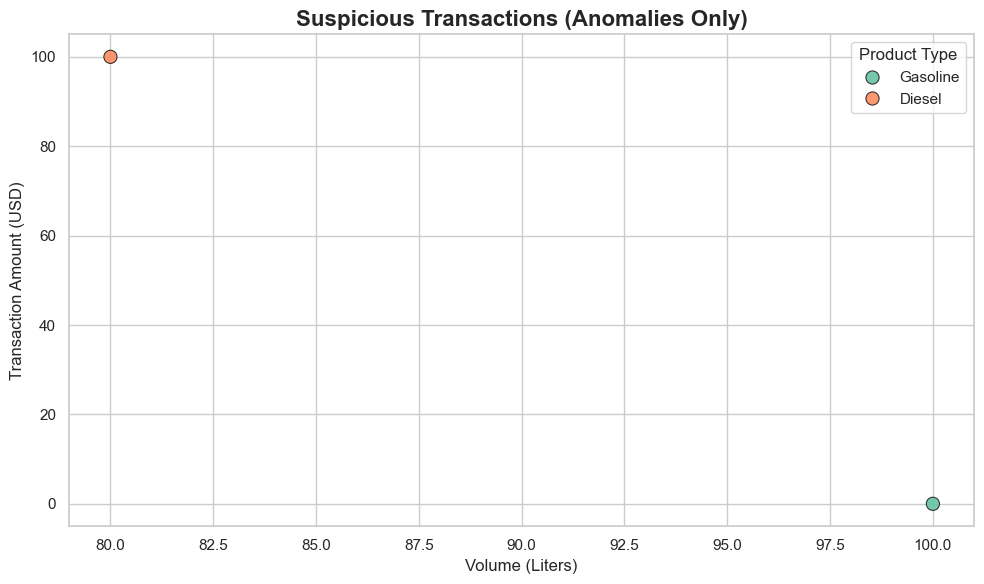

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=anomalies,
    x="volume_liters",
    y="transaction_amount_usd",
    hue="product_type",
    palette="Set2",
    s=90,
    alpha=0.9,
    edgecolor="k"
)

plt.title("Suspicious Transactions (Anomalies Only)", fontsize=16, weight="bold")
plt.xlabel("Volume (Liters)", fontsize=12)
plt.ylabel("Transaction Amount (USD)", fontsize=12)
plt.legend(title="Product Type")
plt.tight_layout()
plt.show()


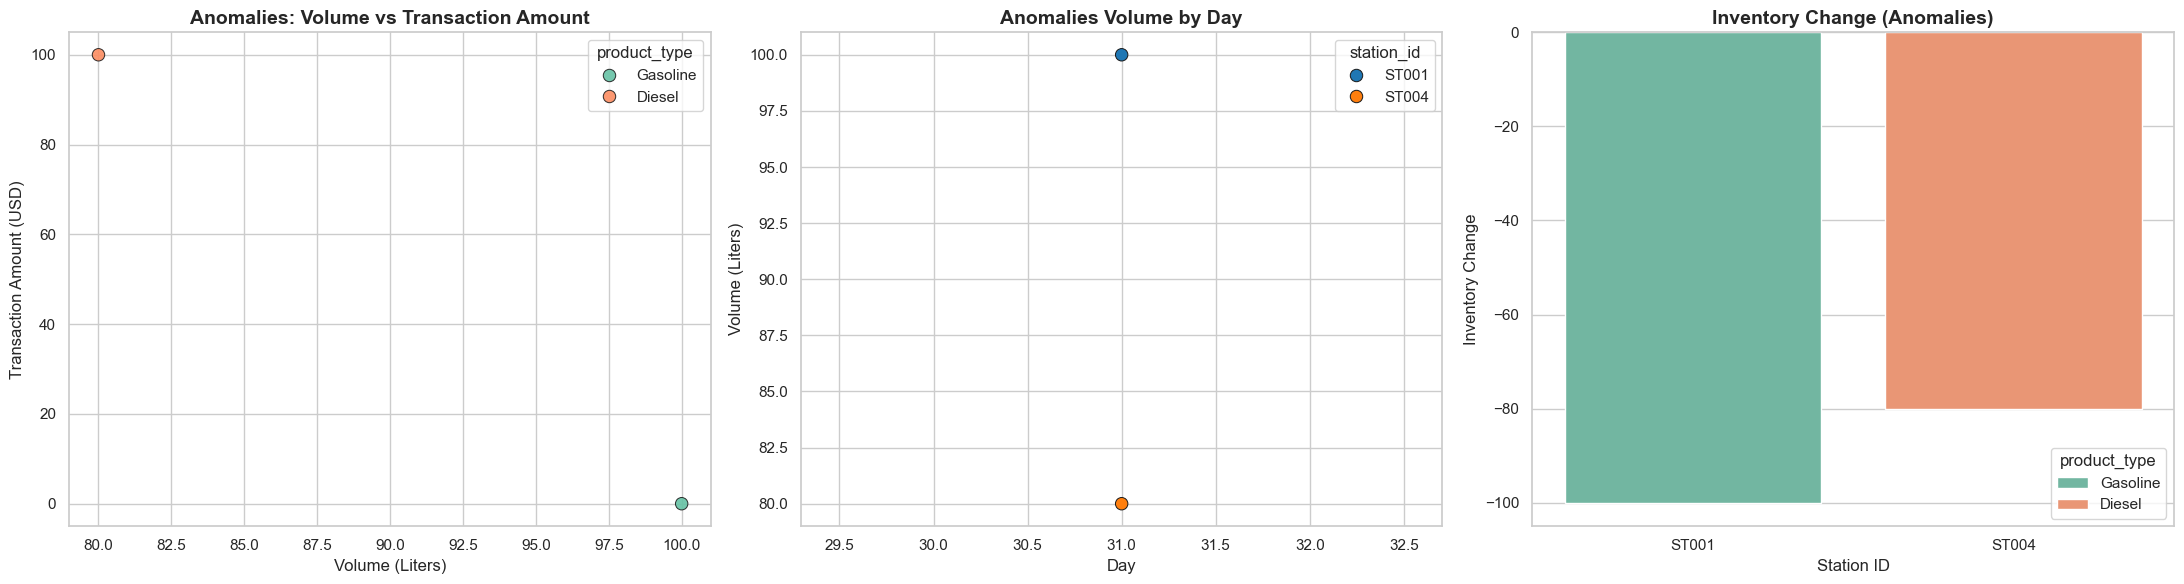

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Scatter Plot of Anomalies
sns.scatterplot(
    data=anomalies,
    x="volume_liters",
    y="transaction_amount_usd",
    hue="product_type",
    palette="Set2",
    s=80,
    alpha=0.9,
    edgecolor="k",
    ax=axes[0]
)
axes[0].set_title("Anomalies: Volume vs Transaction Amount", fontsize=14, weight="bold")
axes[0].set_xlabel("Volume (Liters)")
axes[0].set_ylabel("Transaction Amount (USD)")

# Daily Volume of Anomalies
sns.scatterplot(
    data=anomalies,
    x="day",
    y="volume_liters",
    hue="station_id",
    palette="tab10",
    s=80,
    edgecolor="k",
    ax=axes[1]
)
axes[1].set_title("Anomalies Volume by Day", fontsize=14, weight="bold")
axes[1].set_xlabel("Day")
axes[1].set_ylabel("Volume (Liters)")

# Inventory Changes of Anomalies 
sns.barplot(
    data=anomalies,
    x="station_id",
    y="inventory_change",
    hue="product_type",
    palette="Set2",
    ax=axes[2]
)
axes[2].set_title("Inventory Change (Anomalies)", fontsize=14, weight="bold")
axes[2].set_xlabel("Station ID")
axes[2].set_ylabel("Inventory Change")

# Adjust layout
plt.tight_layout()
plt.show()


In [48]:
# export to CSV for reporting
anomalies.to_csv("anomalies.csv", index=False)
